In [3]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Load the dataset
df = pd.read_csv("bank-full.csv", delimiter=";")
# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

In [5]:
# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))

## Navi Bayes Classifier

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def fit_nb(X_train, y_train, X_valid, y_valid):
    # Define the parameter grid
    parameters = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Using 'var_smoothing' instead of 'alpha'
    }
    
    # Create the model
    model = GaussianNB()
    
    # Perform grid search
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    var_smoothing = [param['var_smoothing'] for param in cv_results['params']]
    plt.plot(var_smoothing, scores, marker='o')
    plt.xlabel('Var Smoothing')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Var Smoothing (NB)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (NB)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_


Mean Test Score: 0.8417264157157776, Parameters: {'var_smoothing': 1e-09}
Mean Test Score: 0.847182437595692, Parameters: {'var_smoothing': 1e-08}
Mean Test Score: 0.8639436839986454, Parameters: {'var_smoothing': 1e-07}
Mean Test Score: 0.8804100508697623, Parameters: {'var_smoothing': 1e-06}
Mean Test Score: 0.8821058535760165, Parameters: {'var_smoothing': 1e-05}


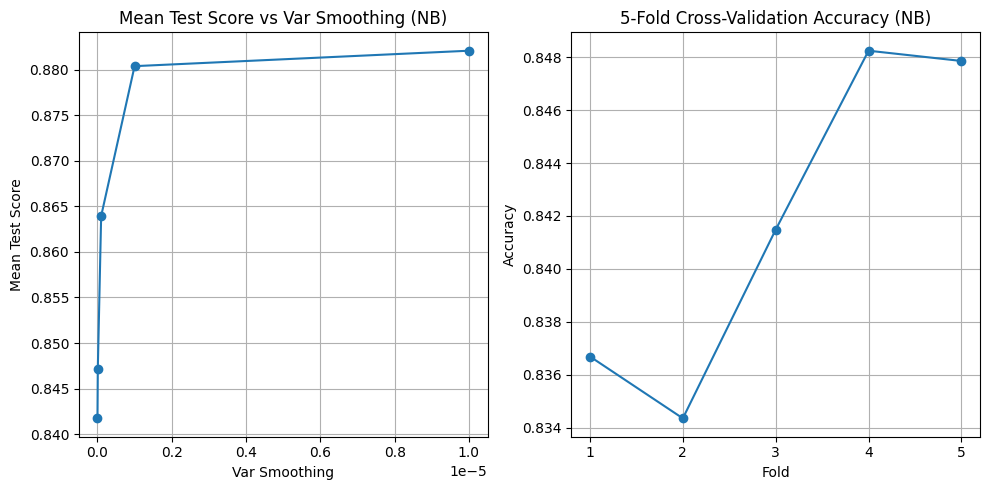

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3968
           1       0.49      0.31      0.37       554

    accuracy                           0.88      4522
   macro avg       0.70      0.63      0.65      4522
weighted avg       0.86      0.88      0.86      4522

Best Score: 0.8821058535760165


In [7]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_nb(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def fit_random_forest(X_train, y_train, X_valid, y_valid):
    parameters = {'n_estimators': [10, 50, 100, 150, 200]}
    
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    n_estimators = [param['n_estimators'] for param in cv_results['params']]
    plt.plot(n_estimators, scores, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Number of Estimators (Random Forest)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (Random Forest)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_


Mean Test Score: 0.9003416546929965, Parameters: {'n_estimators': 10}
Mean Test Score: 0.9047162814800958, Parameters: {'n_estimators': 50}
Mean Test Score: 0.9051832598986156, Parameters: {'n_estimators': 100}
Mean Test Score: 0.9054536267935323, Parameters: {'n_estimators': 150}
Mean Test Score: 0.9052816094545566, Parameters: {'n_estimators': 200}


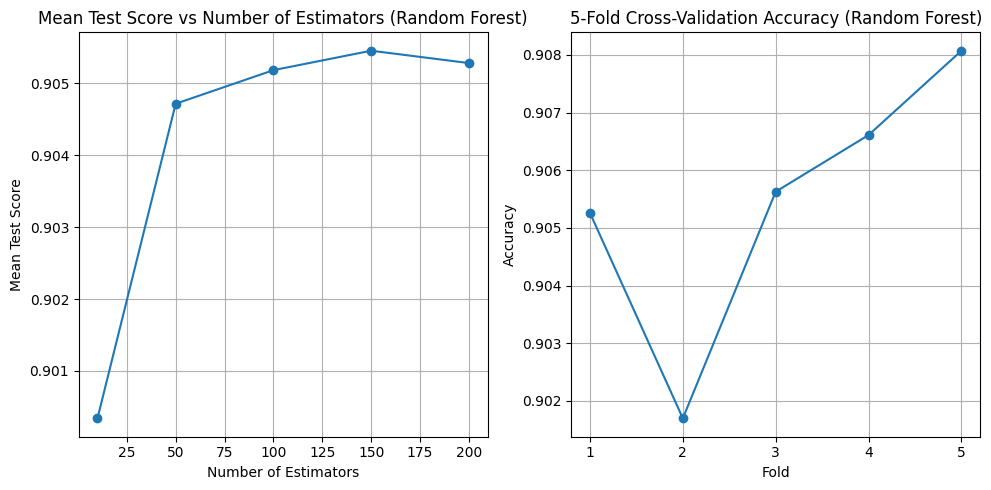

Mean accuracy over 5 folds: 0.9054536267935323
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3968
           1       0.66      0.43      0.52       554

    accuracy                           0.90      4522
   macro avg       0.79      0.70      0.73      4522
weighted avg       0.89      0.90      0.89      4522

Best Score: 0.9054536267935323


In [9]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_random_forest(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)